
#  Распределения

В этом задании мы немного поработаем в python с разными случайными величинами.

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

## Упражнение 1 

> Нормальность восстановлена, мы на орбите Магратеи (Автостопом по галактике) 

__а)__ Задайте генератор для случайной величины имеющей нормальное распределение: $X \sim N(4, 10^2)$. 

In [36]:
norm_rv = sts.norm(loc=4, scale=10)

__б)__ Найдите вероятности $P(X > 4)$, $P(X \in [2; 20])$, $P(X < −5)$. Запишите их в переменные `p1, p2, p3`. 

In [88]:
p1 = 1 - norm_rv.cdf(4)
p2 = norm_rv.cdf(20) - norm_rv.cdf(2)
p3 = norm_rv.cdf(-5)
p1, p2, p3

(0.5, 0.5244604177395451, 0.18406012534675947)

In [9]:
# Проверка корректно ли вы нашли вероятности :) 
# Задание необязательное, поэтому все тесты открытые

assert p1 == 0.5
assert np.abs(p2 - 0.5244604) < 1e-5
assert np.abs(p3 - 0.18406012) < 1e-5

__в)__ Найдите число $a$ такое, что $P(X > a) = 0.3$.

In [89]:
# P(x>a) = 0.3
# 1 - P(x>a) = 1- 0.3
# P(x<a) = 0.7
# F(a) = 0.7
# a - квантиль уровня 0.7
a = norm_rv.ppf(0.7)
a

9.244005127080406

In [11]:
assert np.abs(a - 9.2440051) < 1e-5

__г)__ Найдите число $b$ такое, что $P(X \in [4 - b; 4 + b]) = 0.5$.

In [90]:
# 4 - матожидание, распределение - симметричное
# P(X ∈ [4; 4+b]) = 0.25
# F(4+b) - P(4) = 0.25
# F(4+b) = 0.25 + F(4)
# (4+b) - квантиль уровня (0.25+F(4))
p_4 = norm_rv.cdf(4)
b = norm_rv.ppf(0.25 + p_4) - 4
b

6.744897501960818

In [13]:
assert np.abs(b - 6.7448975) < 1e-5

__д)__ Сгенерируйте выборку размера $100$. Постройте по этой выборке гистограмму. На том же рисунке изобразите плотность распределения нормальной случайной величины. 

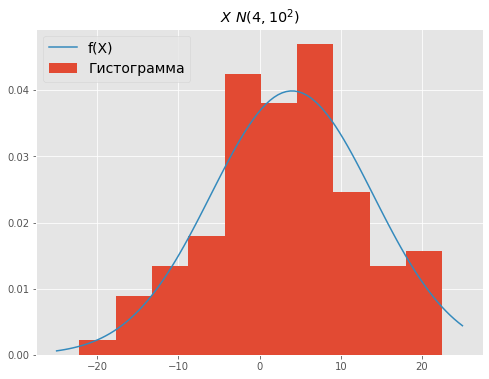

In [50]:
sample = norm_rv.rvs(size=100, random_state=42)
x = np.linspace(-25, 25, 100)
y = norm_rv.pdf(x)

plt.figure(figsize=(8, 6))

plt.hist(sample, bins=10, density=True, label="Гистограмма")
plt.plot(x, y, label="f(X)")

plt.title("$X~N(4, 10^2)$")
plt.legend(fontsize=14)

__е)__ Оцените эмпирическую функцию распределения. Изобразите её и теоретическую функцию распределения на графике. 

In [45]:
#pip install statsmodels

In [46]:
from statsmodels.distributions.empirical_distribution import ECDF

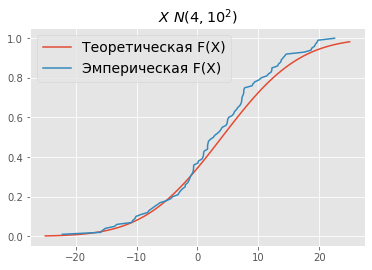

In [49]:
xs = np.linspace(-25, 25, 100)
ys = np.array([norm_rv.cdf(x) for x in xs])
ecdf = ECDF(sample)

plt.plot(xs, ys, label="Теоретическая F(X)")
plt.plot(ecdf.x, ecdf.y, label="Эмперическая F(X)")

plt.title("$X~N(4, 10^2)$")
plt.legend(fontsize=14)

## Упражнение 2 

> Звёзды лучше видны с крыши, полезай и проверь сам. Ты так ждал этот знак свыше, и отметил его как спам. (Дайте танк) 

Пусть количество писем со спамом, которое пришло к нам на почту, имеет распределение Пуассона. Предположим, что вы получаете в среднем три спам-письма в день. Какова доля дней, в которые вы получаете пять или больше спам-писем?

In [51]:
mu = 3
poison_rv = sts.poisson(mu=mu)

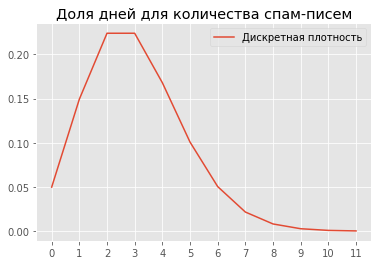

In [91]:
x = np.arange(0, 12)
y = poison_rv.pmf(x)
plt.plot(x, y, label="Дискретная плотность")

plt.title("Доля дней для количества спам-писем")
plt.xticks(range(0, 12))
plt.legend()
plt.show()

In [92]:
# P(X>=5) - ?
# P(X>=5) = 1-P(X<5) = 1-P(X<=4) = 1-F(4)
p = 1 - poison_rv.cdf(4)
p

0.1847367554762278

In [70]:
assert np.abs(p - 0.1847367) < 1e-5

## Упражнение 3 

Во время ЧЕ по футболу 2008 года и ЧМ 2010 года Осьминог Пауль занимался прогнозированием побед (после он ушёл в финансовую аналитику и IB). Осьминог дал верные прогнозы в 12 случаях из 14. Если предположить, что Пауль выбирает победителя наугад, какова вероятность получить 12 верных прогнозов из 14?

In [73]:
binom_rv = sts.binom(n=14, p=0.5)

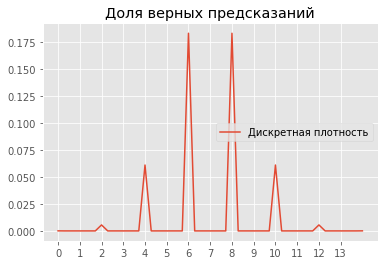

In [79]:
x = np.linspace(0, 14)
y = binom_rv.pmf(x)
plt.plot(x, y, label='Дискретная плотность')

plt.title("Доля верных предсказаний")
plt.xticks(range(0, 14))
plt.legend()
plt.show()

In [84]:
p = binom_rv.pmf(12)
p

0.005554199218750031

In [81]:
assert np.abs(p - 0.0055541) < 1e-5

Если предположить, что Осьминог правильно выбирает победителя с вероятностью $0.9$, какова вероятность получить тот же результат? 

In [85]:
binom_rv2 = sts.binom(n=14, p=0.9)

p = binom_rv2.pmf(12)
p

0.2570108781977113

In [83]:
assert np.abs(p - 0.2570108) < 1e-5